<a href="https://colab.research.google.com/github/mike-jansen/misinformation-analysis-capstone/blob/main/nela_liwc_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import pandas as pd
import numpy as np

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


#Preprocessing
This part unzips the files, loads them, converts to CSV, and then saves them so they can be used in LIWC. Only need to run this if you don't have 'label_0_data.csv' and 'label_1_data.csv'

In [ ]:
# path to the compressed file in Google Drive
path = '/content/drive/MyDrive/Colab Notebooks/data/research/NELA-GT Dataset/json.tar.xz'
file_path = '/content/drive/MyDrive/Colab Notebooks/data/research/liar_dataset/LIWC-22 Results - liar - LIWC Analysis.csv'

# unzip the file
!tar -xf '/content/drive/MyDrive/Colab Notebooks/data/research/NELA-GT Dataset/json.tar.xz'


In [ ]:
import os
import json
import pandas as pd

json_dir = '/content/json/nela-gt-2021/newsdata'
labels_file = '/content/drive/MyDrive/Colab Notebooks/data/research/NELA-GT Dataset/labels.csv'

# Load labels file into a dataframe
labels_df = pd.read_csv(labels_file)

# Create two empty dataframes for the matching JSON data
df_label_0 = pd.DataFrame()
df_label_1 = pd.DataFrame()

# Iterate over the JSON files
for filename in os.listdir(json_dir):
    if filename.endswith('.json'):
        with open(os.path.join(json_dir, filename)) as f:
            data = json.load(f)
            df = pd.json_normalize(data)

            # Get the source from the first row of the dataframe
            source = df['source'][0]

            # Check if the source is in labels_df with a label of 0 or 1
            if source in labels_df.loc[labels_df['label'] == 0, 'source'].values:
                df_label_0 = pd.concat([df_label_0, df])
                print(f"Processed {filename} for label 0 and source {source}")
            if source in labels_df.loc[labels_df['label'] == 1, 'source'].values:
                df_label_1 = pd.concat([df_label_1, df])
                print(f"Processed {filename} for label 1 and source {source}")

# Reset the index of the dataframes
df_label_0 = df_label_0.reset_index(drop=True)
df_label_1 = df_label_1.reset_index(drop=True)

# Save the dataframes to CSV files
df_label_0.to_csv('label_0_data.csv', index=False)
df_label_1.to_csv('label_1_data.csv', index=False)

# Print the number of rows in each dataframe
print(f"Number of rows in df_label_0: {len(df_label_0)}")
print(f"Number of rows in df_label_1: {len(df_label_1)}")


Processed skynewsus.json for label 0 and source skynewsus
Processed jesusdaily.json for label 1 and source jesusdaily
Processed theamericanconservative.json for label 0 and source theamericanconservative
Processed sustainablepulse.json for label 1 and source sustainablepulse
Processed globalresearch.json for label 1 and source globalresearch
Processed awarenessact.json for label 1 and source awarenessact
Processed nowtheendbegins.json for label 1 and source nowtheendbegins
Processed evolutionnewsandviews.json for label 1 and source evolutionnewsandviews
Processed spiegel.json for label 0 and source spiegel
Processed washingtonmonthly.json for label 0 and source washingtonmonthly
Processed cnbc.json for label 0 and source cnbc
Processed democracynow.json for label 0 and source democracynow
Processed theconservativetreehouse.json for label 1 and source theconservativetreehouse
Processed thefiscaltimes.json for label 0 and source thefiscaltimes
Processed needtoknow.json for label 1 and so

In [ ]:
print(df_label_0.head)

In [ ]:
print(df_label_1.head)

In [ ]:
# Create a directory named "output" in your Google Drive
output_dir = '/content/drive/MyDrive/output'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the dataframes to CSV files in the "output" directory
df_label_0.to_csv(os.path.join(output_dir, 'label_0_data.csv'), index=False)
df_label_1.to_csv(os.path.join(output_dir, 'label_1_data.csv'), index=False)

#Analysis

In [ ]:
# load the data
file_path = '/content/drive/MyDrive/Colab Notebooks/data/research/NELA-GT Dataset/'
nela_true = pd.read_csv(file_path + 'LIWC-22 Results - label_0_data - LIWC Analysis.csv')
nela_false = pd.read_csv(file_path + 'LIWC-22 Results - label_1_data - LIWC Analysis.csv')

# filter out unwanted columns
nela_scores_true = nela_true.loc[:, ['Analytic', 'Authentic', 'BigWords', 'ppron']]
nela_scores_false = nela_false.loc[:, ['Analytic', 'Authentic', 'BigWords', 'ppron']]

<ipython-input-8-ecc9a4414ceb>:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  nela_true = pd.read_csv(file_path + 'LIWC-22 Results - label_0_data - LIWC Analysis.csv')
<ipython-input-8-ecc9a4414ceb>:4: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  nela_false = pd.read_csv(file_path + 'LIWC-22 Results - label_1_data - LIWC Analysis.csv')


In [ ]:
# Calculate the mean and median for each category in each DataFrame
true_means = nela_scores_true.mean()
false_means = nela_scores_false.mean()
true_medians = nela_scores_true.median()
false_medians = nela_scores_false.median()

# Create a list of the category names
categories = ['Analytic', 'Authentic', 'BigWords', 'ppron']

# Create lists of the true and false means and medians for each category
true_means_list = [true_means[category] for category in categories]
false_means_list = [false_means[category] for category in categories]
true_medians_list = [true_medians[category] for category in categories]
false_medians_list = [false_medians[category] for category in categories]

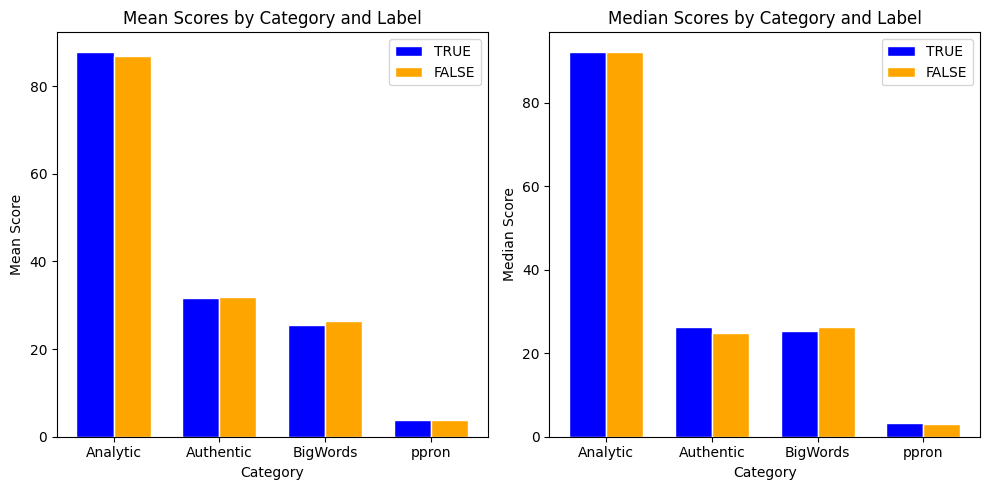

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Set the bar width
bar_width = 0.35

# Plot the mean bar graph in the first subplot
r1 = range(len(categories))
r2 = [x + bar_width for x in r1]
ax1.bar(r1, true_means_list, color='blue', width=bar_width, edgecolor='white', label='TRUE')
ax1.bar(r2, false_means_list, color='orange', width=bar_width, edgecolor='white', label='FALSE')
ax1.set_xlabel('Category')
ax1.set_ylabel('Mean Score')
ax1.set_xticks([r + bar_width/2 for r in range(len(categories))])
ax1.set_xticklabels(categories)
ax1.set_title('Mean Scores by Category and Label')
ax1.legend()

# Plot the median bar graph in the second subplot
r1 = range(len(categories))
r2 = [x + bar_width for x in r1]
ax2.bar(r1, true_medians_list, color='blue', width=bar_width, edgecolor='white', label='TRUE')
ax2.bar(r2, false_medians_list, color='orange', width=bar_width, edgecolor='white', label='FALSE')
ax2.set_xlabel('Category')
ax2.set_ylabel('Median Score')
ax2.set_xticks([r + bar_width/2 for r in range(len(categories))])
ax2.set_xticklabels(categories)
ax2.set_title('Median Scores by Category and Label')
ax2.legend()

# Adjust the spacing between subplots and display the figure
fig.tight_layout()
plt.show()

In [ ]:
nela_false.shape

(288763, 129)